In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Loading the Dataset

In [14]:
df=pd.read_csv('black-friday.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [15]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


## 2. Clean the dataset

In [18]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(0)
df['Product_Category_3'] = df['Product_Category_3'].fillna(0)
missing_values= df[['Product_Category_2', 'Product_Category_3']].isnull().sum()
print("\nMissing Values After Handling:")
print(missing_values)


Missing Values After Handling:
Product_Category_2    0
Product_Category_3    0
dtype: int64


In [19]:
age_map = {'0-17': 8, '18-25': 21, '26-35': 30, '36-45': 40, '46-50': 48, '51-55': 53, '55+': 60}
df['Age'] = df['Age'].map(age_map)
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+', 4).astype(int)
print(df.dtypes) 


Data types after conversion:
User_ID                         int64
Product_ID                     object
Gender                         object
Age                             int64
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object


In [21]:
print( df.duplicated().sum())
df = df.drop_duplicates()
print( df.duplicated().sum())
purchase_upper_limit = 20000
df = df[df['Purchase'] <= purchase_upper_limit]
df = df[(df['Product_Category_1'] >= 1) & (df['Product_Category_1'] <= 20)]
df = df[(df['Product_Category_2'] >= 1) & (df['Product_Category_2'] <= 20)]
df = df[(df['Product_Category_3'] >= 1) & (df['Product_Category_3'] <= 20)]

df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})

age_map = {'0-17': 8, '18-25': 21, '26-35': 30, '36-45': 40, '46-50': 48, '51-55': 53, '55+': 60}
df['Age'] = df['Age'].map(age_map)

df = pd.get_dummies(df, columns=['City_Category'], drop_first=True)

print("\nData types after encoding and cleaning:")
print(df.dtypes)

0
0

Data types after encoding and cleaning:
User_ID                         int64
Product_ID                     object
Gender                          int64
Age                           float64
Occupation                      int64
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
City_Category_B                  bool
City_Category_C                  bool
dtype: object


##  Perform EDA analysis.
## &&
## Generate visualizations using matplotlib and seaborns.

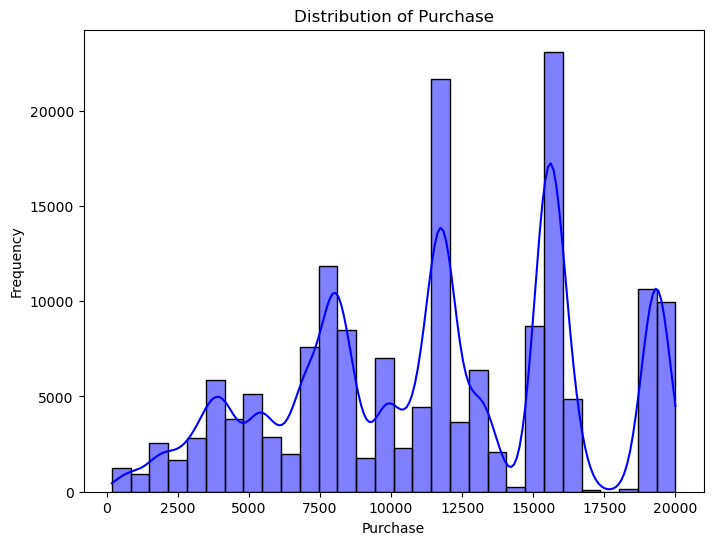

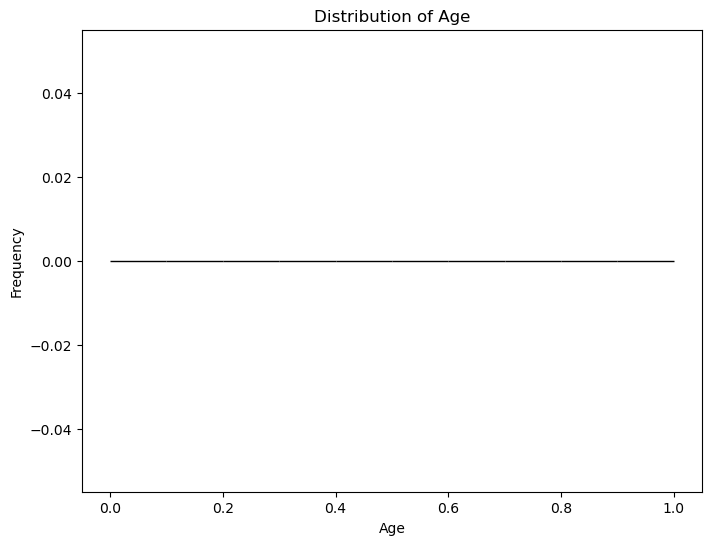

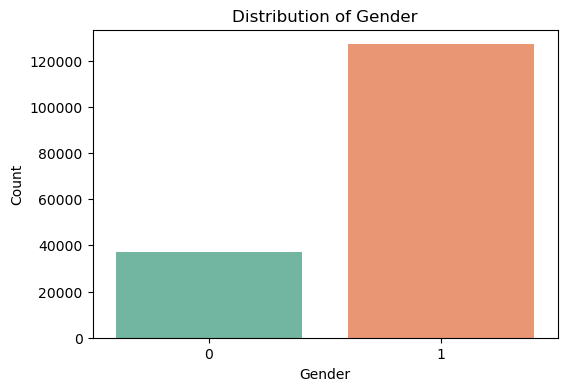

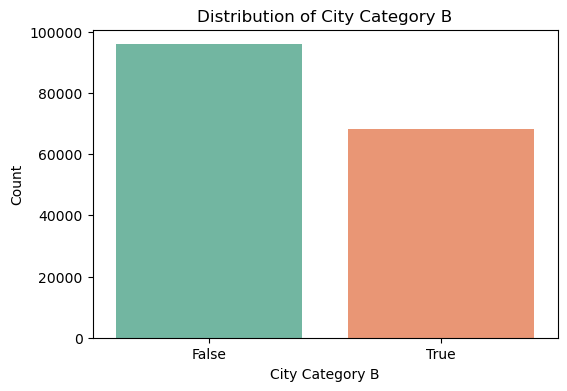

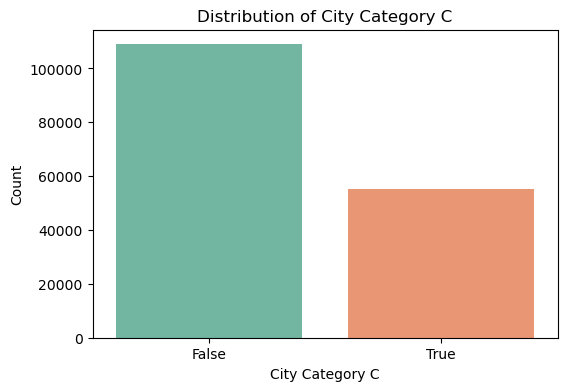

In [26]:

# Univariate Analysis
plt.figure(figsize=(8, 6))
sns.histplot(df['Purchase'], bins=30, kde=True, color='blue')
plt.title('Distribution of Purchase')
plt.xlabel('Purchase')
plt.ylabel('Frequency')
plt.show()

# Distribution of 'Age'
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=10, kde=True, color='green')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of 'Gender'
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', palette='Set2')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Distribution of 'City_Category'
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='City_Category_B', palette='Set2')
plt.title('Distribution of City Category B')
plt.xlabel('City Category B')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='City_Category_C', palette='Set2')
plt.title('Distribution of City Category C')
plt.xlabel('City Category C')
plt.ylabel('Count')
plt.show()



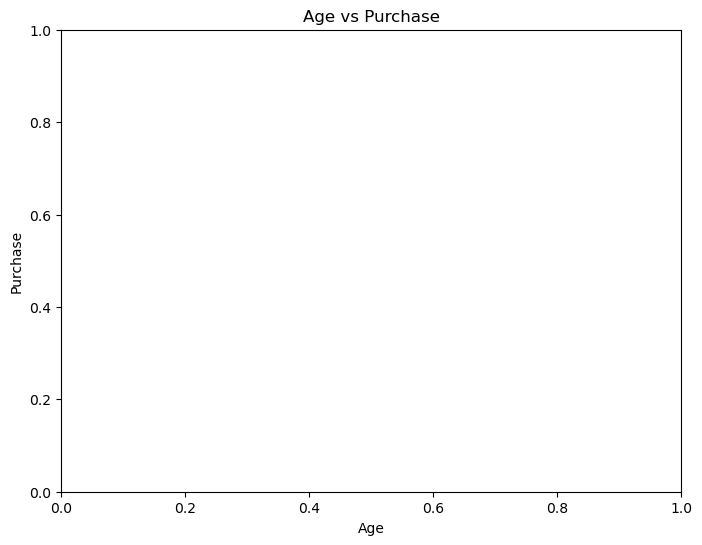

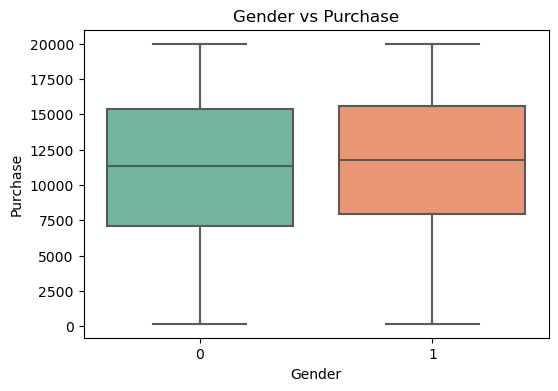

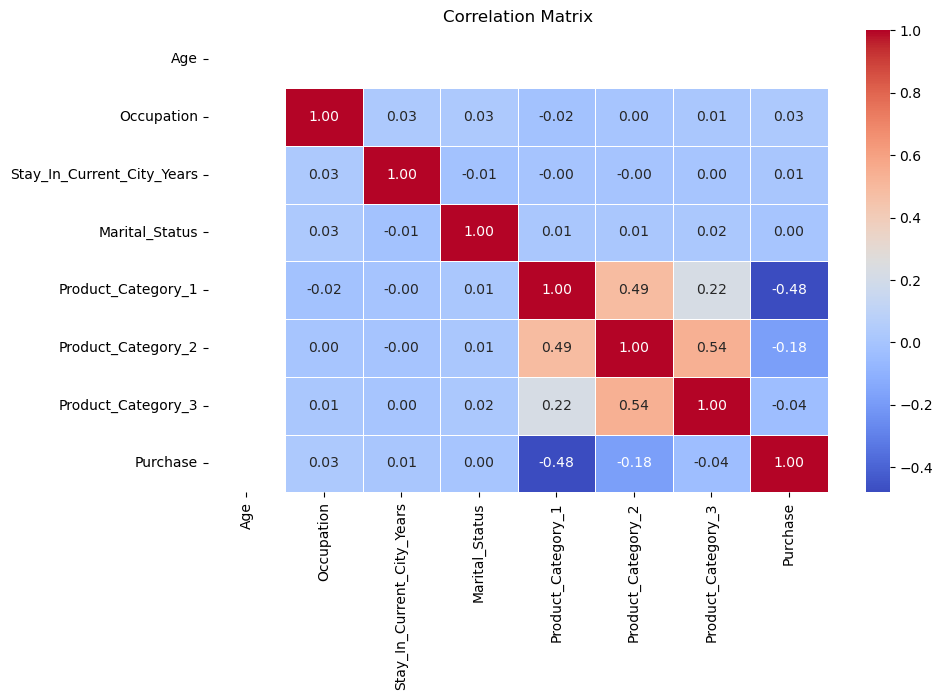

In [23]:
#  Bivariate Analysis
# Relationship between 'Age' and 'Purchase'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Purchase', color='orange')
plt.title('Age vs Purchase')
plt.xlabel('Age')
plt.ylabel('Purchase')
plt.show()

# Relationship between 'Gender' and 'Purchase'
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Gender', y='Purchase', palette='Set2')
plt.title('Gender vs Purchase')
plt.xlabel('Gender')
plt.ylabel('Purchase')
plt.show()

# Correlation Analysis
# Heatmap of Correlation Matrix
correlation_matrix = df[['Age', 'Occupation', 'Stay_In_Current_City_Years', 'Marital_Status', 
                         'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



##   what I observed from the  visualizations.

- **Purchase Distribution:** Most customers tend to make smaller purchases, with fewer high-value purchases, suggesting a right-skewed distribution.

- **Age Distribution:** The majority of customers fall within the younger age groups (18-35), indicating a youthful customer base.

- **Gender Distribution:** There are slightly more female customers than male customers in the dataset, though the difference is not huge.

- **Age vs Purchase:** Older customers tend to make slightly higher-value purchases, though the correlation is not very strong.

## Create Feature selection variables


In [27]:
df.to_csv('cleaned_black_friday.csv', index=False)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

df = pd.read_csv('cleaned_black_friday.csv')

numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()
target_corr = correlation_matrix['Purchase'].sort_values(ascending=False)

selected_features_corr = target_corr[target_corr.abs() > 0.1].index.tolist()
print("Selected Features based on Correlation with Purchase:")
print(selected_features_corr)

X = df.drop(columns=['Purchase', 'User_ID', 'Product_ID'])  
y = df['Purchase']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_

model_selection = SelectFromModel(rf, threshold=0.01, max_features=None, importance_getter='auto')
model_selection.fit(X, y)

selected_features_model = X.columns[model_selection.get_support()]
print("\nSelected Features based on Random Forest Feature Importance:")
print(selected_features_model)

final_selected_features = list(set(selected_features_corr).union(set(selected_features_model)))
print("\nFinal Selected Features (Combining Correlation and Model-based Selection):")
print(final_selected_features)


Selected Features based on Correlation with Purchase:
['Purchase', 'Product_Category_2', 'Product_Category_1']

Selected Features based on Random Forest Feature Importance:
Index(['Gender', 'Occupation', 'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'City_Category_B', 'City_Category_C'],
      dtype='object')

Final Selected Features (Combining Correlation and Model-based Selection):
['Marital_Status', 'Stay_In_Current_City_Years', 'City_Category_B', 'Purchase', 'City_Category_C', 'Product_Category_1', 'Product_Category_3', 'Product_Category_2', 'Gender', 'Occupation']


## Select Target Variable

In [ ]:
X = df[final_selected_features]  
y = df['Purchase'] 

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)


Features (X) shape: (164001, 10)
Target (y) shape: (164001,)


## Splitting the data into two parts training and testing.

In [31]:
from sklearn.model_selection import train_test_split

X = df[final_selected_features]  
y = df['Purchase'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Features (X_train) shape:", X_train.shape)
print("Test Features (X_test) shape:", X_test.shape)
print("Training Target (y_train) shape:", y_train.shape)
print("Test Target (y_test) shape:", y_test.shape)


Training Features (X_train) shape: (131200, 10)
Test Features (X_test) shape: (32801, 10)
Training Target (y_train) shape: (131200,)
Test Target (y_test) shape: (32801,)


#  Implementing the models one by one.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse}")
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# 1.Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f"Linear Regression RMSE: {rmse_lr}")

# 2.Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest RMSE: {rmse_rf}")

# 3.Ridge Regression
ridge = Ridge(alpha=1.0)  
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f"Ridge Regression RMSE: {rmse_ridge}")



Root Mean Squared Error (RMSE): 0.26967327659120516
Linear Regression RMSE: 1.99232184973761e-12
Random Forest RMSE: 0.26967327659120516
Ridge Regression RMSE: 1.7536858582347055e-09


#  Calculate the predictions for all three models


In [ ]:
y_pred_lr = lr.predict(X_test)

y_pred_rf = rf.predict(X_test)

y_pred_ridge = ridge.predict(X_test)

print("Linear Regression Predictions: ", y_pred_lr[:5])  
print("Random Forest Predictions: ", y_pred_rf[:5])  
print("Ridge Regression Predictions: ", y_pred_ridge[:5])  


Linear Regression Predictions:  [ 3488. 11514. 11528.  9641.  7625.]
Random Forest Predictions:  [ 3488. 11514. 11528.  9641.  7625.]
Ridge Regression Predictions:  [ 3488. 11514. 11528.  9641.  7625.]


## Compare the three r2 using matplotlib

Linear Regression R²: 1.0
Random Forest R²: 0.9999999970809674
Ridge Regression R²: 1.0


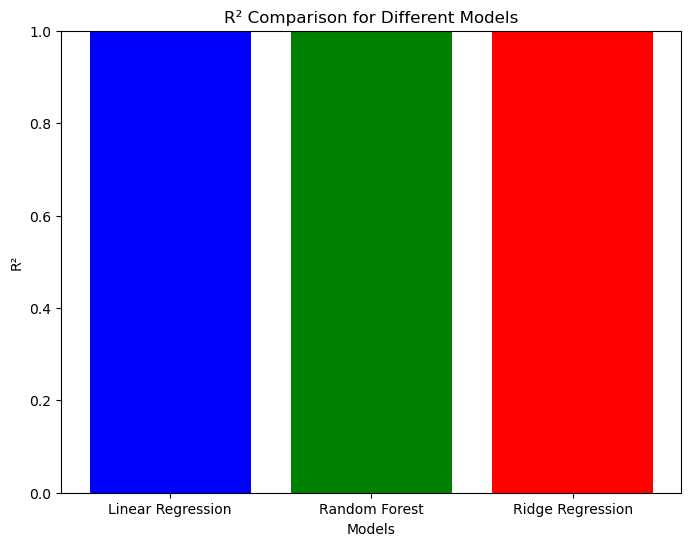

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

r2_lr = r2_score(y_test, y_pred_lr)
r2_rf = r2_score(y_test, y_pred_rf)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Linear Regression R²: {r2_lr}")
print(f"Random Forest R²: {r2_rf}")
print(f"Ridge Regression R²: {r2_ridge}")

models = ['Linear Regression', 'Random Forest', 'Ridge Regression']
r2_values = [r2_lr, r2_rf, r2_ridge]

plt.figure(figsize=(8, 6))
plt.bar(models, r2_values, color=['blue', 'green', 'red'])
plt.title('R² Comparison for Different Models')
plt.xlabel('Models')
plt.ylabel('R²')
plt.ylim([0, 1])
plt.show()
